<a href="https://colab.research.google.com/github/almartcas/oooo/blob/main/Comparacion_PD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparación de diagramas de persistencia.

En este notebook vamos a crear dos diagramas de persistencia con el mismo número de puntos y a utilizar la distancia de Bottleneck y Wasserstein para calcular la distnacia a la que se encuentran y por tanto conocer el nivel de similitud entre ellos.

In [ ]:
!pip install cython
!pip install ripser

from ripser import ripser
from persim import plot_diagrams
import numpy as np
import matplotlib.pyplot as plt
from ripser import Rips

In [ ]:
!pip install gudhi
import gudhi
import gudhi.hera.wasserstein

Primero construimos dos diagramas de persistencia con un dataset inicial con el mismo número de puntos.

**Diagrama 1:**

In [6]:
data1=np.array([[0.9822056 , 0.36493877],
       [0.50298887, 0.9267979 ],
       [0.23574578, 0.35935633],
       [0.55150194, 0.54188547],
       [0.31985077, 0.98478966],
       [0.90971858, 0.60986595],
       [0.66289489, 0.98271819],
       [0.76184398, 0.0173718 ]])
data1

array([[0.9822056 , 0.36493877],
       [0.50298887, 0.9267979 ],
       [0.23574578, 0.35935633],
       [0.55150194, 0.54188547],
       [0.31985077, 0.98478966],
       [0.90971858, 0.60986595],
       [0.66289489, 0.98271819],
       [0.76184398, 0.0173718 ]])

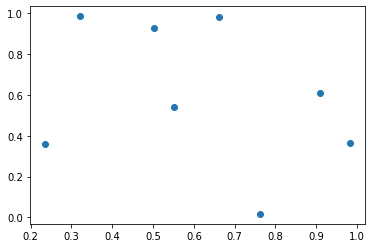

In [7]:
x1, y1 = data1.T
plt.scatter(x1,y1)
plt.show()

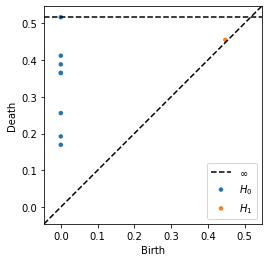

In [8]:
diagrams1 = ripser(data1)['dgms']
plot_diagrams(diagrams1, show=True)

Una vez tenemos el diagrama de persistencia mostramos las coordenadas de los puntos para utilizarlas despues en el cálculo de las distancias.

In [9]:
diagrams1

[array([[0.        , 0.16940193],
        [0.        , 0.19210051],
        [0.        , 0.25542843],
        [0.        , 0.36461008],
        [0.        , 0.36471748],
        [0.        , 0.3879576 ],
        [0.        , 0.41153619],
        [0.        ,        inf]]), array([[0.44714731, 0.45468876]])]

**Diagrama 2:**

Para el segundo diagrama, vamos a crear un diagrama de persistenncia a partir de un dataset inicial calculado aleatoriamente.

In [10]:
data2 = np.random.random((8,2))
data2

array([[0.02531656, 0.49793314],
       [0.28616328, 0.80932601],
       [0.95693102, 0.6184383 ],
       [0.14829674, 0.12346046],
       [0.20834531, 0.6381668 ],
       [0.20464008, 0.10872905],
       [0.67419027, 0.1373888 ],
       [0.0970731 , 0.71965908]])

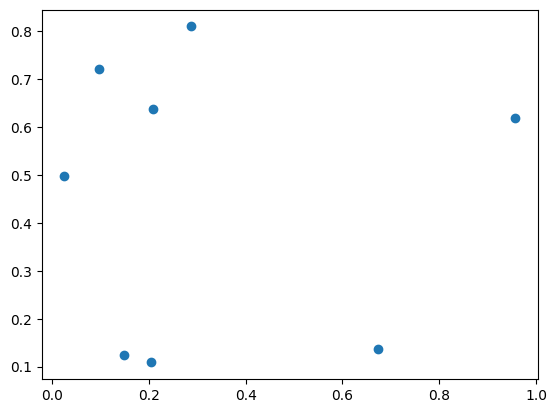

In [11]:
x2, y2 = data2.T
plt.scatter(x2,y2)
plt.show()

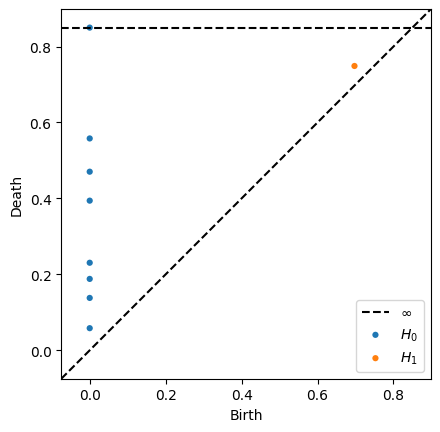

In [12]:
diagrams2 = ripser(data2)['dgms']
plot_diagrams(diagrams2, show=True)

In [13]:
diagrams2

[array([[0.        , 0.05823733],
        [0.        , 0.13792206],
        [0.        , 0.1880189 ],
        [0.        , 0.23057538],
        [0.        , 0.3941496 ],
        [0.        , 0.47042403],
        [0.        , 0.55798829],
        [0.        ,        inf]]), array([[0.69740051, 0.74884564]])]

A continuación, con la información de los diagramas de persistencia anteriores, calculamos la distancia de Bottleneck entre ellos.

In [ ]:
diag1 = [[0.        , 0.16940193],
        [0.        , 0.19210051],
        [0.        , 0.25542843],
        [0.        , 0.36461008],
        [0.        , 0.36471748],
        [0.        , 0.3879576 ],
        [0.        , 0.41153619],
        [0.        , float('Inf')]]
diag2 = [[0.        , 0.05823733],
        [0.        , 0.13792206],
        [0.        , 0.1880189 ],
        [0.        , 0.23057538],
        [0.        , 0.3941496 ],
        [0.        , 0.47042403],
        [0.        , 0.55798829],
        [0.        ,        float('Inf')]]

In [14]:
message = "La distancia de Bottleneck es " + '%.2f' % gudhi.bottleneck_distance(diag1, diag2)
print(message)

La distancia de Bottleneck es 0.15


In [23]:
message = "Wasserstein distance value = " + '%.2f' % gudhi.hera.wasserstein.wasserstein_distance(diag1, diag2, order=1., internal_p=2.)
print(message)

Wasserstein distance value = 0.62
